### Table Of Contents
--------------------
1. [Import Modules](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#1-Import-Modules)
2. [Basic Statistical Description](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#2-Basic-Statistical-Description)
3. [Handling Missing Values](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#3-Handling-Missing-Values)
4. [Data Visualization](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#4-Data-Visualization)
5. [Feature Engineering](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#5-Feature-Engineering)
    - [Identifying Outliers](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Identifying-Outliers)
    - [Applying Feature Transformations](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Applying-Feature-Transformations)
    - [Encoding the Categorical Columns](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Encoding-the-Categorical-Columns)
    - [Dealing with Datetime Columns](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Dealing-with-Datetime-Columns)
    - [Feature Extraction](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Feature-Extraction)
    - [Data Preprocessing](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Data-Preprocessing)
6. [Building and Evaluating Models](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#6-Building-and-Evaluating-Models)
    - [Simple Linear Regression](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Simple-Linear-Regression)
    - [Ridge Regressor](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Ridge-Regressor)
    - [Lasso Regressor](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Lasso-Regressor)
    - [Polynomial Regression](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Polynomial-Regression)
    - [Decision Tree Regressor](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Decision-Tree-Regressor)
    - [Random Forest Regressor](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Random-Forest-Regressor)
    - [AdaBoost Regressor](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#AdaBoost-Regressor)
    - [Gradient Boost Regressor](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Gradient-Boost-Regressor)
7. [Hyperparameter Tuning the Models](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#7-Hyperparameter-Tuning-the-Models)
    - [Hyperparameter Tuning Decision Tree](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Hyperparameter-Tuning-Decision-Tree)
    - [Hyperparameter Tuning Gradient Boost](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#Hyperparameter-Tuning-Gradient-Boost)
8. [Comparing the Models](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#8-Comparing-the-Models)
9. [Preprocess the Test Data](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#9-Preprocess-the-Test-Data)
10. [Create the Submission File](https://www.kaggle.com/code/ravitejaiitm/21f1005274-notebook-t32023#10-Create-the-Submission-File)

# 1 Import Modules

In [1]:
# Importing the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Loading Train Dataset
train = pd.read_csv('train.csv')

In [3]:
# Loading Test Dataset
test = pd.read_csv('test.csv')

In [4]:
# To see the first 5 rows of the training data
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [5]:
# TO get an idea of the datatypes and the null counts in the data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

We can observe that there are 5 columns that are having null values, and seems they all are absent for the same rows, as they missing count is equal for all!

# 2 Basic Statistical Description

In [6]:
# Basic statistical description for all the numeric columns
train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


**Key Observations On Numeric Columns:**
1. VendorID:
    - The majority of trips are associated with VendorID 1.
    - VendorID ranges from 0 to 2, and VendorID 2 seems less frequent.
    
    
2. Passenger_count:
    - While the 75% count shows the value 1, the max value shows 9, which might indicate some data anomalies.


3. trip_distance:
    - The standard deviation seems unusually high, suggesting potential outliers or data issues.
    - The minimum trip distance is 0, which is suspicious and need further investigation !!
    
    
4. RatecodeID
    - Most trips have a RatecodeId of 1.
    - The max RatecodeID is 99, which needs further understanding as of what it means !!
    
    
5. PULocationID and DOLocationID:
    - The pickup and drop location show exactly similar description.
    - These IDs range from 1 to 264.
    
    
6. Extra, tolls_amount, total_amount, improvement_surcharge, congestion_surcharge, Airport_Fee:
    - Need Understnading as of why there are negative values in these columns and their significance.
    

In [7]:
# Basic statistical description for all the categorical columns
train[train.select_dtypes(include='object').columns].describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag,payment_type
count,175000,175000,168923,175000
unique,109877,109713,2,5
top,2023-06-28 18:11:16,2023-06-29 19:08:22,N,Credit Card
freq,8,10,167729,135257


**Key Observations On Category Columns:**
1. Almost 99% values in store_and_fwd_flag are N !!
2. Almost 70% payment_types are of Credi Card

# 3 Handling Missing Values

In [8]:
# Storing the names of all the columns with null values in an array, to keep in handy for further analysis
cols_having_nan = [train.isna().sum().index[i] for i,v in enumerate(train.isna().sum()) if v>0]
cols_having_nan

['passenger_count',
 'RatecodeID',
 'store_and_fwd_flag',
 'congestion_surcharge',
 'Airport_fee']

In [9]:
# unique value counts from all the features with missing values.
for i in cols_having_nan:
    print(f'Unique Value count in {i}')
    print(train[i].value_counts(dropna=False))
    print('\n---------------------------------------------------------')

Unique Value count in passenger_count
1.0    128534
2.0     24316
NaN      6077
3.0      6018
4.0      3668
0.0      2818
5.0      1970
6.0      1596
8.0         2
9.0         1
Name: passenger_count, dtype: int64

---------------------------------------------------------
Unique Value count in RatecodeID
1.0     158652
2.0       7314
NaN       6077
5.0       1036
99.0       748
3.0        727
4.0        446
Name: RatecodeID, dtype: int64

---------------------------------------------------------
Unique Value count in store_and_fwd_flag
N      167729
NaN      6077
Y        1194
Name: store_and_fwd_flag, dtype: int64

---------------------------------------------------------
Unique Value count in congestion_surcharge
 2.5    153212
 0.0     14325
 NaN      6077
-2.5      1386
Name: congestion_surcharge, dtype: int64

---------------------------------------------------------
Unique Value count in Airport_fee
 0.00    153074
 1.75     15590
 NaN       6077
-1.75       259
Name: Airport_fee

**Key Observations:**
1. Top one clear thing is they all have the same missing values count, probably could have been the same rows.
2. Passenger count and RatecodeID are the discrete variables, and also they have some outliers, hence it doesn't seem appropriate to impute the missing values in those columns with mean! By observation, we can say that median and mode will also be mostly same for these two columns, hence we can impute with anyone of them for these two columns.
3. Congestion surge and Airport fee look more like categorical values, as their unique values are only 3 in each column. Hence it doesn't seem appropriate to impute with mean or median, so they can be imputed with mode.

In [10]:
# Cross-checking the median and mode for two of the columns with missing values.
print('Passenger Count Median and Mode')
print(f'Median - {train.passenger_count.median()}')
print(f'Mode - {train.passenger_count.mode()[0]}')

print('\nRatecodeID Median and Mode')
print(f'Median - {train.passenger_count.median()}')
print(f'Mode - {train.passenger_count.mode()[0]}')


print('\nCongestion Surcharge Median and Mode')
print(f'Median - {train.congestion_surcharge.median()}')
print(f'Mode - {train.congestion_surcharge.mode()[0]}')

print('\nAirport_fee Median and Mode')
print(f'Median - {train.Airport_fee.median()}')
print(f'Mode - {train.Airport_fee.mode()[0]}')

Passenger Count Median and Mode
Median - 1.0
Mode - 1.0

RatecodeID Median and Mode
Median - 1.0
Mode - 1.0

Congestion Surcharge Median and Mode
Median - 2.5
Mode - 2.5

Airport_fee Median and Mode
Median - 0.0
Mode - 0.0


As they are same, we can impute with either median or mode.

In [11]:
# Imputing all the missing values in each column with most frequent value from that particular column, using SimpleImputer API from sklearn module.
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with the most frequent strategy
imputer_mode = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the train data
imputer_mode = imputer_mode.fit(train[cols_having_nan])


In [12]:
# Cross-checking the info to see if the null values are imputed
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

Now, all the null values are imputed wtih the most frequent value from that column.

# 4 Data Visualization

In [13]:
train.select_dtypes(exclude='object').columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')

In [14]:
len(train.select_dtypes(exclude='object').columns.to_numpy())

13

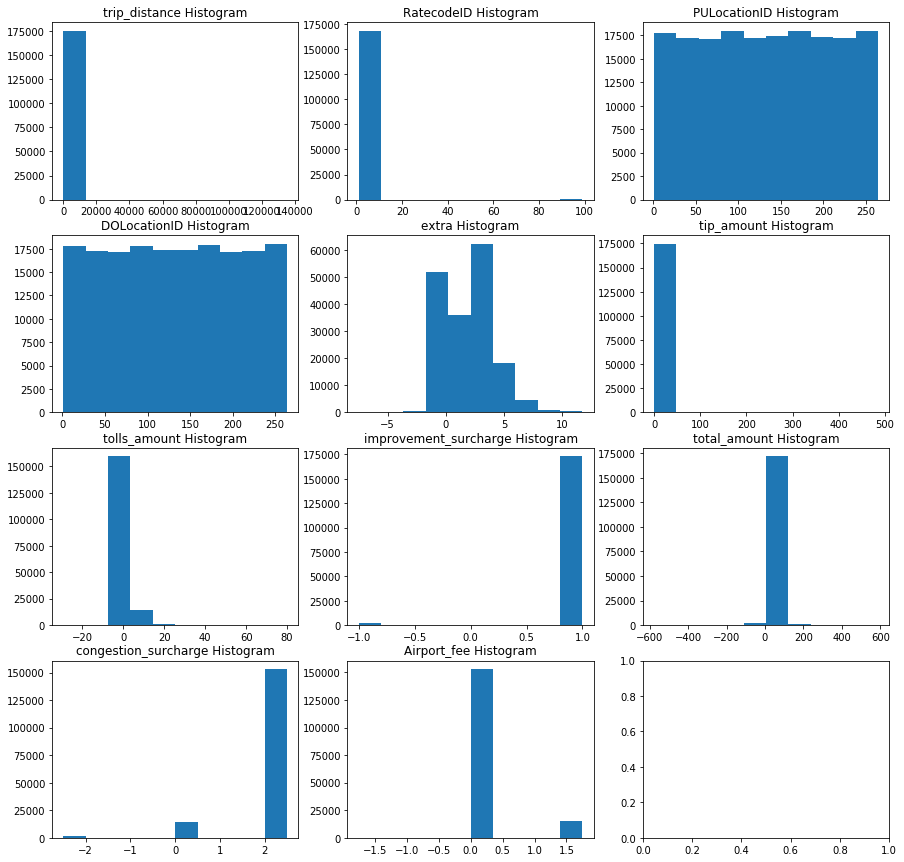

In [15]:
# Visualizing the histograms for all the numeric Columns
a, b = 0, 0
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
for i in train.select_dtypes(exclude='object').columns[2:]:
    if b > 2:
        b = 0
        a += 1
    train[i].plot(kind='hist', ax=ax[a, b])
    ax[a,b].set_title(f'{i} Histogram')
    ax[a, b].set_ylabel('')  
    b += 1

# Show the plot
plt.show()


In [16]:
train.select_dtypes(include='object').columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag',
       'payment_type'],
      dtype='object')

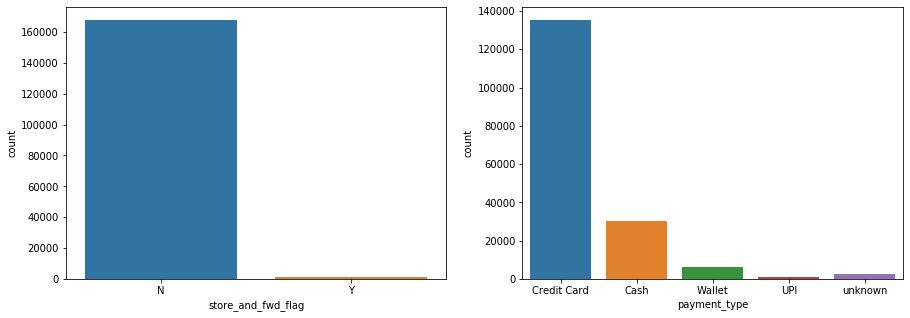

In [17]:
# Visualizing the histograms for all the numeric Columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=train,x='store_and_fwd_flag',ax=ax[0])
sns.countplot(data=train,x='payment_type',ax=ax[1])
# Show the plot
plt.show()


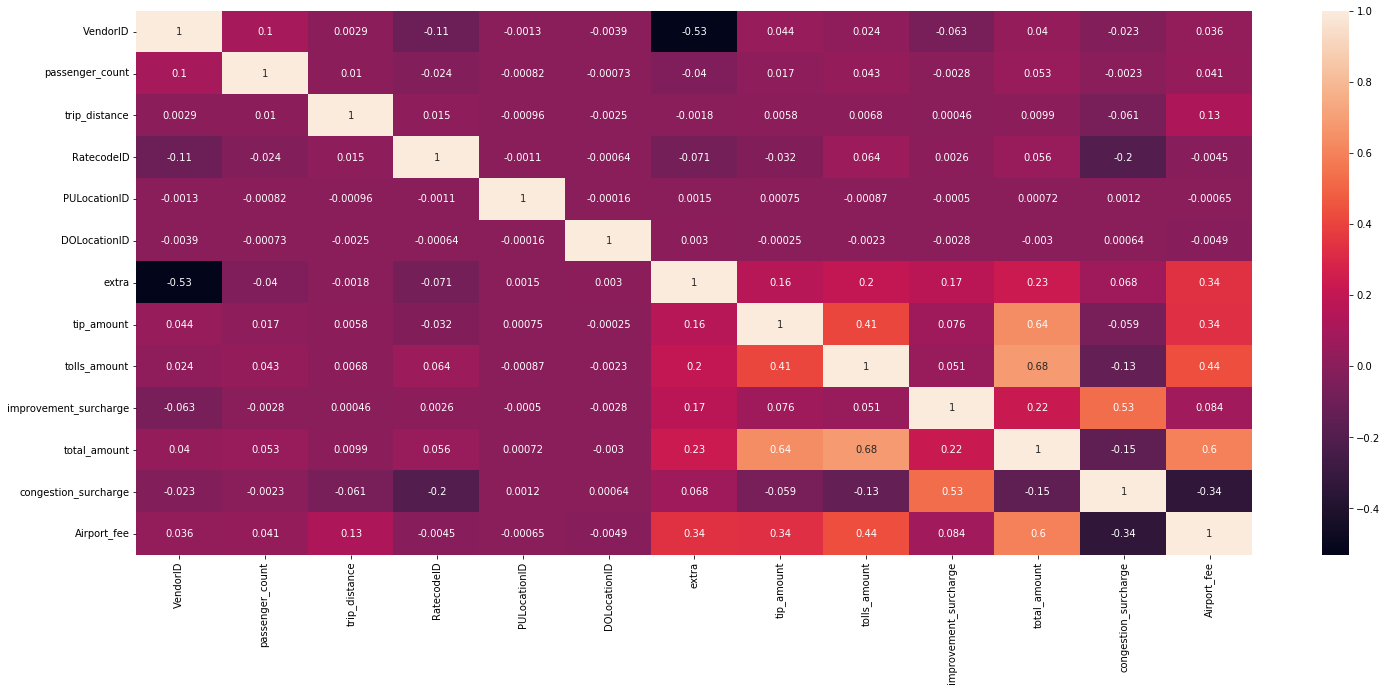

In [18]:
plt.figure(figsize=(25,10))
sns.heatmap(train.select_dtypes(exclude=['object']).corr(),annot=True)

# 5 Feature Engineering 

#### Note: Will be Creating Individual functions for most of the preprocessing steps, as they will be handy when preprocessing the test dataset.

## Identifying Outliers

In [19]:
def print_outliers_percentage(column_name: str, column_data: pd.Series, addtodf='n'):
    
    # Calculate the IQR (Interquartile Range) for the column
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    iqr = q3 - q1

    # Identify outliers using the specified threshold
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Count the number of outliers in the column
    outliers_count = ((column_data < lower_bound) | (column_data > upper_bound)).sum()

    # Calculate the percentage of outliers for the column
    outliers_percentage = (outliers_count / len(column_data)) * 100
    
    if addtodf == 'y' :
        # If y, add them to a dictionary for better visulization
        outliers['Column'].append(column_name)
        outliers['LowerBound'].append(lower_bound)
        outliers['UpperBound'].append(upper_bound)
        outliers['OutliersCount'].append(outliers_count)
        outliers['OutliersPer'].append(outliers_percentage)
    else:
        # else, Print
        print(f"{column_name}| \t Lower bound: {lower_bound} |\t Upper bound: {upper_bound} |\t Outliers Count: {outliers_count} | \t Outliers Percentage: {outliers_percentage:.2f}%")


In [20]:
outliers = {'Column':[],'LowerBound':[],'UpperBound':[],'OutliersCount':[],'OutliersPer':[]}
for i in train.select_dtypes(exclude='object').columns:
    print_outliers_percentage(i,train[i],'y')

df_outliers = pd.DataFrame(outliers)
df_outliers

,Column,LowerBound,UpperBound,OutliersCount,OutliersPer
0,VendorID,-1.500000,2.500000,0,0.000000
1,passenger_count,1.000000,1.000000,40389,23.079429
2,trip_distance,-2.715000,7.405000,24133,13.790286
3,RatecodeID,1.000000,1.000000,10271,5.869143
4,PULocationID,-131.000000,397.000000,0,0.000000
5,DOLocationID,-131.000000,397.000000,0,0.000000
6,extra,-3.750000,6.250000,4406,2.517714
7,tip_amount,-2.570815,13.546882,11218,6.410286
8,tolls_amount,0.000000,0.000000,15672,8.955429
9,improvement_surcharge,1.000000,1.000000,1855,1.060000


In [21]:
df_outliers[df_outliers.OutliersPer>10]

,Column,LowerBound,UpperBound,OutliersCount,OutliersPer
1,passenger_count,1.000,1.000,40389,23.079429
2,trip_distance,-2.715,7.405,24133,13.790286
10,total_amount,-6.950,55.050,23479,13.416571


- We can observe that few columns have very large amount of outliers!! If we take more than 10%, then we have passenger count, trip distance, and total amount.
- So we should try feature transformation for these columns with high outliers.

## Applying Feature Transformations

In [22]:
def check_transformations(col):
    # Apply Transformations for passenger count column
    
    print_outliers_percentage(f'{col}',train[col],'y')

    logtf = np.log(train[col])
    print_outliers_percentage(f'Log Transformed for {col} ',logtf,'y')

    sqrt = np.sqrt(train[col])
    print_outliers_percentage(f'Square Transformed for {col} ',sqrt,'y')

    exp = np.exp(train[col])
    print_outliers_percentage(f'Exponential Transformed for {col} ',exp,'y')
    
    reci = 1/train[col]
    print_outliers_percentage(f'Reciprocal Transformed for {col} ',reci,'y')
    
    df_outliers = pd.DataFrame(outliers)
    return df_outliers

In [23]:
outliers = {'Column':[],'LowerBound':[],'UpperBound':[],'OutliersCount':[],'OutliersPer':[]}
check_transformations('passenger_count')

C:\Users\raviteja\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Column,LowerBound,UpperBound,OutliersCount,OutliersPer
0,passenger_count,1.000000,1.000000,40389,23.079429
1,Log Transformed for passenger_count,0.000000,0.000000,40389,23.079429
2,Square Transformed for passenger_count,1.000000,1.000000,40389,23.079429
3,Exponential Transformed for passenger_count,2.718282,2.718282,40389,23.079429
4,Reciprocal Transformed for passenger_count,1.000000,1.000000,40389,23.079429


- It seems transformations are not having an affect on passenger_count column, but imputing them with any other values will change the meaning of the data. So leaving them be!

In [24]:
# Apply Transformations for the trip distance column
outliers = {'Column':[],'LowerBound':[],'UpperBound':[],'OutliersCount':[],'OutliersPer':[]}
check_transformations('trip_distance')

C:\Users\raviteja\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\raviteja\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Column,LowerBound,UpperBound,OutliersCount,OutliersPer
0,trip_distance,-2.715000,7.405000,24133,13.790286
1,Log Transformed for trip_distance,-1.733159,3.093828,4856,2.774857
2,Square Transformed for trip_distance,-0.251924,3.191154,16456,9.403429
3,Exponential Transformed for trip_distance,-48.087380,87.998113,36060,20.605714
4,Reciprocal Transformed for trip_distance,-0.696368,1.899302,11153,6.373143


- We can see that when applied log transformation,the outliers are mostly reduced for trip distance column.

C:\Users\raviteja\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


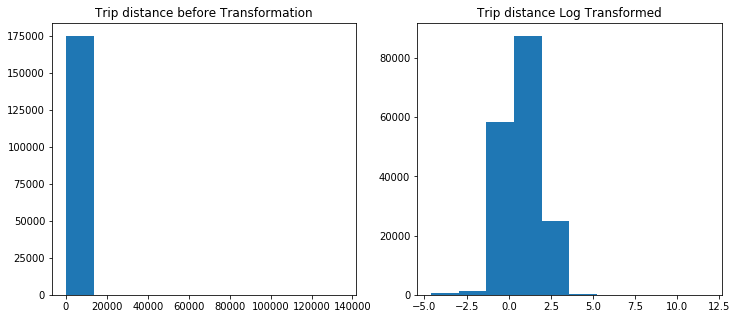

In [25]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].hist(train.trip_distance)
ax[0].set_title('Trip distance before Transformation')

logtf=np.log(train.trip_distance)
ax[1].hist(logtf[logtf!=-np.inf])
ax[1].set_title('Trip distance Log Transformed')

plt.show()

- We can confirm the distribution is better off now than before. So we can modify the trip distance column with log transformation.

In [26]:
outliers = {'Column':[],'LowerBound':[],'UpperBound':[],'OutliersCount':[],'OutliersPer':[]}
check_transformations('total_amount')

C:\Users\raviteja\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\raviteja\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Column,LowerBound,UpperBound,OutliersCount,OutliersPer
0,total_amount,-6.950000e+00,5.505000e+01,23479,13.416571
1,Log Transformed for total_amount,1.798354e+00,4.462160e+00,9165,5.237143
2,Square Transformed for total_amount,1.649560e+00,8.049910e+00,17732,10.132571
3,Exponential Transformed for total_amount,-9.697408e+13,1.616235e+14,41755,23.860000
4,Reciprocal Transformed for total_amount,-1.454034e-02,1.062852e-01,3883,2.218857


- We can see that outliers are reduced drastically by applying reciprocal transformation and log transformations.

C:\Users\raviteja\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\raviteja\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


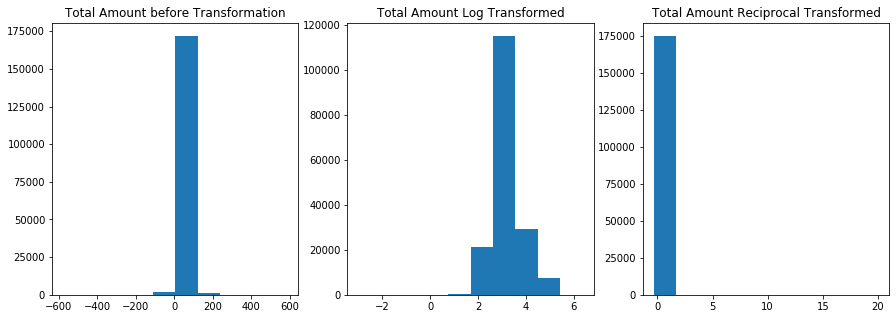

In [27]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].hist(train.total_amount)
ax[0].set_title('Total Amount before Transformation')

logtf=np.log(train.total_amount)
ax[1].hist(logtf[logtf!=-np.inf])
ax[1].set_title('Total Amount Log Transformed')

reci=1/train.total_amount
ax[2].hist(reci[reci!=np.inf])
ax[2].set_title('Total Amount Reciprocal Transformed')

plt.show()

- Recirprocal Transformation is reducing the outliers, but the distribution still isn't normal. Where as log transformation is kind of changing the distribution to normal, hence proceeding with the log transformation.

In [28]:
def apply_transformations(n_data):
    data = n_data
    data.trip_distance = np.log(data.trip_distance)
    return data

- Applying the Transformation for trip distance column.
- Transformation for total amount is not yiedling the better results, hence ignoring that.

## Encoding the Categorical Columns

In [29]:
train.select_dtypes(include='object').columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag',
       'payment_type'],
      dtype='object')

- Datetime columns can be dealt in a short bit, for now concentrating on the categorical columns. 
- Then there only two are categorical ( store_and_fwd_flag, payment_type ). 

In [30]:
def onehot_encoding(data):
    # Columns to one-hot encode
    columns_to_one_hot_encode = ['store_and_fwd_flag', 'payment_type']
    
    # Apply one-hot encoding using pd.get_dummies
    encoded = pd.get_dummies(data, columns=columns_to_one_hot_encode)

    return encoded

## Dealing with Datetime Columns

- Now that categorical are dealt with, all that's left is date time columns.

In [31]:
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


- If we take a close look at the first two rows, we can see that the pickup time is after the drop time, which doesn't make much sense!
- Assuming it is a data error, and planning to swap the dates in a row, if pickup_datetime is greater than the dropoff_datetime.

In [32]:
# will be using the apply method on the dataset, so this will loop through rows and if there are such dates they will be swapped.
def swap_dates(row):
    if row.tpep_pickup_datetime>row.tpep_dropoff_datetime:
        row.tpep_pickup_datetime,row.tpep_dropoff_datetime=row.tpep_dropoff_datetime,row.tpep_pickup_datetime
    return row

- I Believe trip duration is one thing that can be useful, so we can extract that feature by using the pickup_dateime and dropoff_datetime.

In [33]:
# To Extract the trip duration feature, which return the square root of trip duration in minutes.
def add_trip_duration(ndata):
    data = ndata
    
    # Converting the datetime columns to pandas datetime
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
    data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
    
    # Creating trip duration in minutes column
    data['sqrt_trip_duration_min'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60
    
    # Taking square-root of it, so it will be in a short range.
    data['sqrt_trip_duration_min'] = np.sqrt(data['sqrt_trip_duration_min'])
    
    return data

- And seperating the day, hour, minute from the datetime columns. 

In [34]:
def split_dates(n_data):
    data = n_data
    
    # Creating columns for day,hour,minute and day of week    
    data['tpep_pickup_datetime_day'] = data['tpep_pickup_datetime'].dt.day
    data['tpep_pickup_datetime_hour'] = data['tpep_pickup_datetime'].dt.hour
    data['tpep_pickup_datetime_minute'] = data['tpep_pickup_datetime'].dt.minute
    data['tpep_pickup_datetime_dayofweek'] = data['tpep_pickup_datetime'].dt.dayofweek

    data['tpep_dropoff_datetime_day'] = data['tpep_dropoff_datetime'].dt.day
    data['tpep_dropoff_datetime_hour'] = data['tpep_dropoff_datetime'].dt.hour
    data['tpep_dropoff_datetime_minute'] = data['tpep_dropoff_datetime'].dt.minute
    data['tpep_dropoff_datetime_dayofweek'] = data['tpep_dropoff_datetime'].dt.dayofweek
    
    # Dropping the date time columns
    data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)
    
    return data

## Feature Extraction

In [35]:
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


- We Generally know that the rides at late night will be much costiler than day time, so we can extract a feature that says whether it is a late night ride or not.
- I am considering the light night rides from 11pm to 5am, and Marking 1 if the pickup time is in that range, and 0 if not.

In [36]:
# To Extract Late night rides feature
def add_late_night_boolean(ndata):
    data = ndata    
    late_night_indices = data[(data['tpep_pickup_datetime_hour']<=5) | (data['tpep_pickup_datetime_hour']>=23)].index
    data['late_night_rides'] = data.index.isin(late_night_indices).astype(int)
    
    return data

## Data Preprocessing

- Creating one Main function of data preprocessing which will handle all the above preprocessing steps in order.
- And this will be handy to preprocess the test dataset.

In [37]:
def data_preprocessing(n_data):
    data = n_data
    
    # impute categorical column missing values with mode
    data[cols_having_nan] = imputer_mode.transform(data[cols_having_nan])
    
    # One hot encoding categorical columns
    data = onehot_encoding(data)
    
    # After onehot encoding, columns will have bool dtype, so changing them to numeric.
    for i in data.select_dtypes(include='bool').columns:
        data[i]=data[i].astype(int)
    
    # Swapping the dates when the pickup time is greater than the drop off time
    data = data.apply(swap_dates,axis=1)
    
    # Trip Duration Feature Extraction
    data = add_trip_duration(data)
    
    # Cleaning Dates Column
    data = split_dates(data)
    
    # Feature Transformation for trip distance column
    data = apply_transformations(data)
    
    # Trip distance might create few infinity values, which are to be replaced.
    data.trip_distance=data.trip_distance.replace(-np.inf,data.trip_distance[data.trip_distance!=-np.inf].mean())
    
    # Late night Rides Feature Extraction
    data = add_late_night_boolean(data)
    
    return data

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
preprocess = Pipeline([])

In [38]:
train = data_preprocessing(train)

C:\Users\raviteja\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   VendorID                         175000 non-null  int64  
 1   passenger_count                  175000 non-null  float64
 2   trip_distance                    175000 non-null  float64
 3   RatecodeID                       175000 non-null  float64
 4   PULocationID                     175000 non-null  int64  
 5   DOLocationID                     175000 non-null  int64  
 6   extra                            175000 non-null  float64
 7   tip_amount                       175000 non-null  float64
 8   tolls_amount                     175000 non-null  float64
 9   improvement_surcharge            175000 non-null  float64
 10  total_amount                     175000 non-null  float64
 11  congestion_surcharge             175000 non-null  float64
 12  Ai

In [40]:
train.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,sqrt_trip_duration_min,tpep_pickup_datetime_day,tpep_pickup_datetime_hour,tpep_pickup_datetime_minute,tpep_pickup_datetime_dayofweek,tpep_dropoff_datetime_day,tpep_dropoff_datetime_hour,tpep_dropoff_datetime_minute,tpep_dropoff_datetime_dayofweek,late_night_rides
0,1,1.0,0.760806,1.0,120,9,2.5,7.165589,0.0,1.0,...,6.752777,28,16,34,2,28,17,20,2,0
1,0,1.0,0.993252,1.0,15,215,3.5,6.067401,0.0,1.0,...,7.964505,29,22,1,3,29,23,5,3,0
2,1,1.0,0.139762,1.0,167,223,0.0,4.111547,0.0,1.0,...,7.324616,30,10,19,4,30,11,13,4,0
3,0,1.0,-0.916291,1.0,128,239,2.5,6.411079,0.0,1.0,...,7.540999,29,13,23,3,29,14,20,3,0
4,1,3.0,0.095310,1.0,203,52,1.0,4.769377,0.0,1.0,...,4.339739,29,22,3,3,29,22,22,3,0


In [41]:
train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,sqrt_trip_duration_min,tpep_pickup_datetime_day,tpep_pickup_datetime_hour,tpep_pickup_datetime_minute,tpep_pickup_datetime_dayofweek,tpep_dropoff_datetime_day,tpep_dropoff_datetime_hour,tpep_dropoff_datetime_minute,tpep_dropoff_datetime_dayofweek,late_night_rides
count,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,...,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000
mean,0.728377,1.345257,0.764043,1.500309,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,...,6.122704,29.117817,15.122017,29.512823,3.179189,28.913023,15.098274,29.501411,3.211137,0.107149
std,0.445606,0.878116,1.009022,6.401268,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,...,2.661323,1.471844,5.627547,17.334942,0.743258,2.890162,6.088586,17.303691,0.751670,0.309303
min,0.000000,0.000000,-4.605170,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,...,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,1.000000,0.095310,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,...,4.219005,29.000000,11.000000,14.000000,3.000000,29.000000,11.000000,15.000000,3.000000,0.000000
50%,1.000000,1.000000,0.641854,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,...,6.159004,29.000000,16.000000,30.000000,3.000000,29.000000,17.000000,30.000000,3.000000,0.000000
75%,1.000000,1.000000,1.283708,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,...,8.015610,30.000000,19.000000,45.000000,4.000000,30.000000,20.000000,45.000000,4.000000,0.000000
max,2.000000,9.000000,11.814378,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,...,39.206505,30.000000,23.000000,59.000000,5.000000,30.000000,23.000000,59.000000,5.000000,1.000000


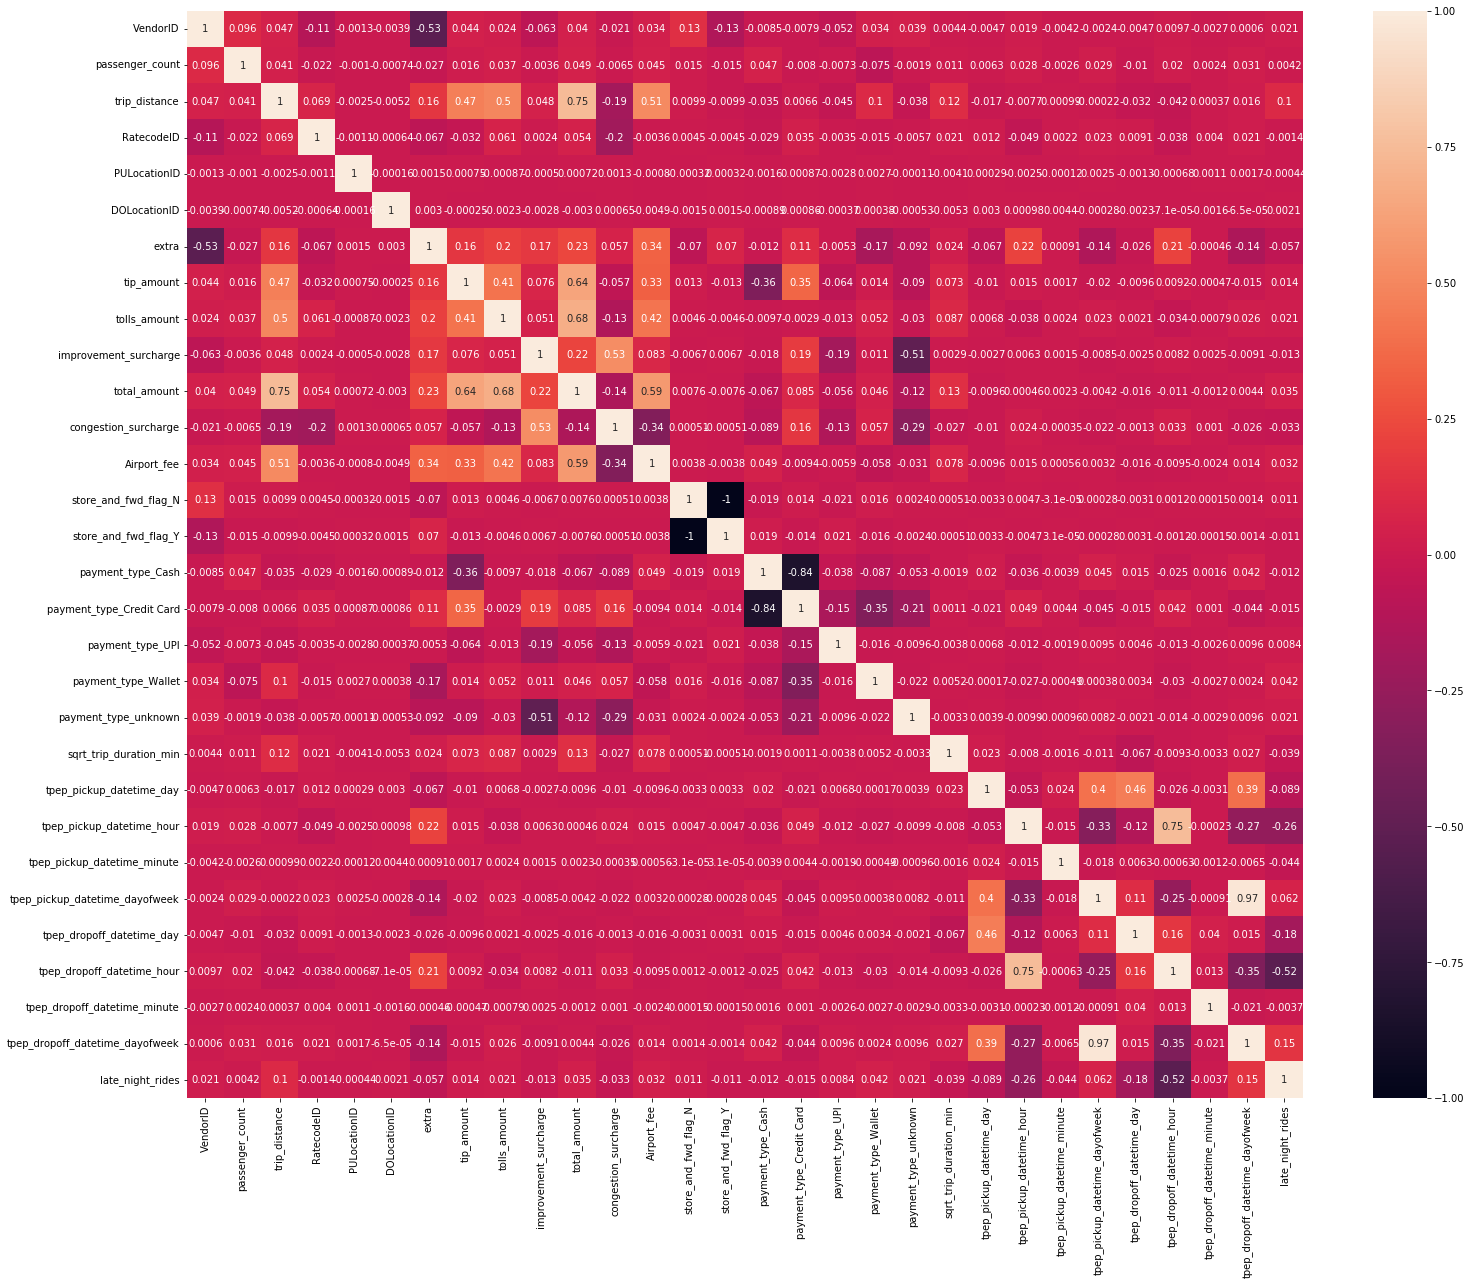

In [42]:
plt.figure(figsize=(25,20))
sns.heatmap(train.corr(),annot=True)

#### Now the data is all good to pass to the Machine Learning Models.

# 6 Building and Evaluating Models

For the ease of Evaluation creating a function, which will take input of the model, X and y. And prints the MSE Score and R2 Score.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def print_scores(model,X,y):

    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

    model.fit(X_train,y_train)
    ytrain_preds = model.predict(X_train)
    ytest_preds = model.predict(X_test)
    
    print("-----Training Dataset Results--------")
    print(f'Mean squared error = {mean_squared_error(y_train,ytrain_preds)}')
    print(f'R2 Score on Training dataset = {r2_score(y_train,ytrain_preds)}')
    print("\n\n-----Validation Dataset Results--------")
    print(f'Mean squared error = {mean_squared_error(y_test,ytest_preds)}')
    print(f'R2 Score on Validation dataset = {r2_score(y_test,ytest_preds)}')

## Simple Linear Regression

- As it's a Regressor model, we can start off with the simple linear regression model.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = train.drop('total_amount',axis=1)
y = train['total_amount']

lr = LinearRegression()
print_scores(lr,X,y)

-----Training Dataset Results--------
Mean squared error = 126.66000043027192
R2 Score on Training dataset = 0.8038530054650435


-----Validation Dataset Results--------
Mean squared error = 131.54403048828044
R2 Score on Validation dataset = 0.7971520281119466


- The model performs slightly better on the validation dataset, which is a positive sign. R2 scores indicates that seems to generalize well to both the training and validation datasets. 

- However, there is still chance for reducing the mean squared error.

In [57]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial regression with degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit a linear regression model on the polynomial features
poly_model = LinearRegression()

print_scores(poly_model,X_poly,y)

-----Training Dataset Results--------
Mean squared error = 68.96999412116969
R2 Score on Training dataset = 0.8931923494867778


-----Validation Dataset Results--------
Mean squared error = 69.3170848400093
R2 Score on Validation dataset = 0.8931093260196195


## Ridge Regressor

- Now, Attempting Ridge regression, a regularization technique to enhance the simple linear regression model's performance.

In [44]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_model = Ridge(alpha=1.0) 
print_scores(ridge_model,X,y)

-----Training Dataset Results--------
Mean squared error = 126.66001577905821
R2 Score on Training dataset = 0.8038529816957534


-----Validation Dataset Results--------
Mean squared error = 131.54389186921253
R2 Score on Validation dataset = 0.7971522418700068


- However, the results doesn't show improvements !! So we can try more algorithms.

## Lasso Regressor

- Lasso regression, another regularization method, was applied on attempt to refine the simple linear regression model.

In [59]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
print_scores(lasso_model,X,y)

-----Training Dataset Results--------
Mean squared error = 150.3426996804026
R2 Score on Training dataset = 0.7671777309931656


-----Validation Dataset Results--------
Mean squared error = 154.98113655373479
R2 Score on Validation dataset = 0.7610107496772238


- This time, the results seems to drop comparing to the Simple Linear Model, and the Ridge Model !!

## Decision Tree Regressor

- After the Linear models backfired in such way, it's time to opt some non-linear models, starting with Decision Tree Regressor.
- A decision tree regressor was implemented to capture non-linear relationships within the data.

In [60]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=11,min_samples_split=11, min_samples_leaf=3)
print_scores(dtr,X,y)

-----Training Dataset Results--------
Mean squared error = 32.363315236805576
R2 Score on Training dataset = 0.9498818332913126


-----Validation Dataset Results--------
Mean squared error = 41.58113444697989
R2 Score on Validation dataset = 0.9358796536789573


- It seems that Decision tree excels in fitting the training data with a low MSE and high R2.
- And there is a slight reduction in performance on the validation, but still it is high no matter.

## Random Forest Regressor

- Attempted random forest regressor, which is an ensemble of decision trees, for enhanced predictive performance.

In [61]:
from sklearn.ensemble import RandomForestRegressor

best_rf = RandomForestRegressor(n_estimators=100)
print_scores(best_rf, X, y)

-----Training Dataset Results--------
Mean squared error = 5.553646172490361
R2 Score on Training dataset = 0.9913995657528499


-----Validation Dataset Results--------
Mean squared error = 30.0722487726032
R2 Score on Validation dataset = 0.953626974549947


- Random forest produce remarkably low MSE almost perfect R2 Score.
- And maintaining high R2 on the validation set, proves that the data is not much overfitting.
- However, can opt hyperparameter tuning to see how the performance changes with parameters.

## Gradient Boost Regressor

- Onto Boosting Algorithms, starting with Gradient Boosting, which is implemented to sequentially improve model predictions by focusing on areas of error.

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(n_estimators=100, random_state=42)
print_scores(grad_boost, X, y)

-----Training Dataset Results--------
Mean squared error = 37.69304247007178
R2 Score on Training dataset = 0.9416281622432711


-----Validation Dataset Results--------
Mean squared error = 39.51273722087115
R2 Score on Validation dataset = 0.9390692334783417


- Gradient boosting achieves strong fit on the training set with a relatively low MSE and high R2, but not extremely high as random forest.
- Effectively generalizes the validation data as well, by maintaining the high R2.
- However, can opt hyperparameter tuning to see how the performance changes with parameters.

## XGBoost Regressor

- Finally Implemented XGBoost, which is an optimized and efficient gradient boosting algorithm, and employed for its speed, scalability, and regularization capabilities.

In [63]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X, y)
print_scores(xgb_regressor,X,y)

-----Training Dataset Results--------
Mean squared error = 13.310678796016568
R2 Score on Training dataset = 0.9793869443218884


-----Validation Dataset Results--------
Mean squared error = 34.92294086182033
R2 Score on Validation dataset = 0.9461469463882831


- Just like Random forest, it shows exceptional R2 score on training data,but not as low MSE as Random Forest.
- Generalizes the validation set, maintaining high R2 with a slightly higher MSE.

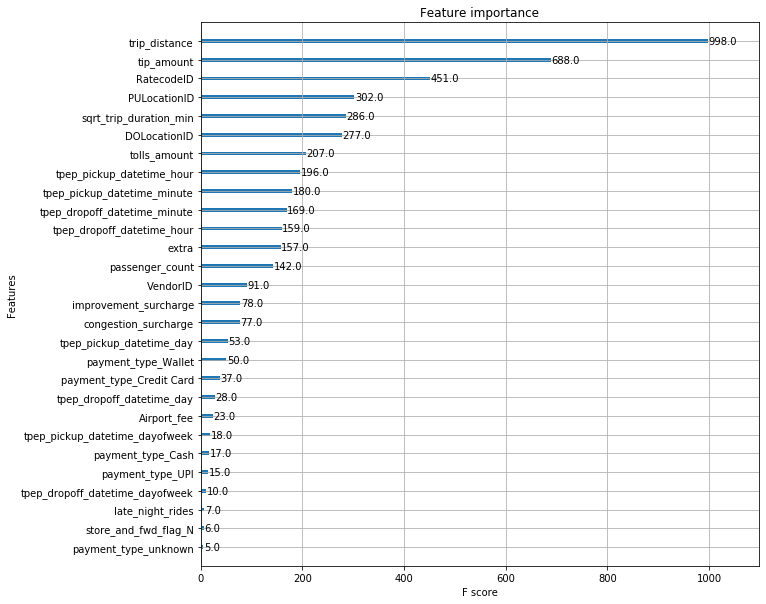

In [71]:
# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figsize as needed
xgb.plot_importance(xgb_regressor,ax=ax)
plt.show()

# 7 Hyperparameter Tuning the Models

## Hyperparameter Tuning Random Forest

from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor()

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5)

In [50]:
best_rf = RandomForestRegressor(n_estimators=100, max_depth=12, min_samples_split=2 )
print_scores(best_rf, X, y)

-----Training Dataset Results--------
Mean squared error = 20.02569109405704
R2 Score on Training dataset = 0.9689880064089599


-----Validation Dataset Results--------
Mean squared error = 31.78948244203765
R2 Score on Validation dataset = 0.9509789078470366


## Hyperparameter Tuning Gradient Boost


gb_model = GradientBoostingRegressor()


param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 4, 8, 10]
}


grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='neg_mean_squared_error', cv=5)

In [51]:
best_grad = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth=8)
print_scores(best_grad, X, y)

-----Training Dataset Results--------
Mean squared error = 9.053358682217983
R2 Score on Training dataset = 0.9859798745465692


-----Validation Dataset Results--------
Mean squared error = 29.94918503543351
R2 Score on Validation dataset = 0.9538167454533106


## Hyperparameter Tuning the XGBoost 


xgb_model = XGBRegressor()

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}


grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='neg_mean_squared_error', cv=5)

In [52]:
best_xgb = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=8)
print_scores(best_xgb,X,y)

-----Training Dataset Results--------
Mean squared error = 9.977556833215015
R2 Score on Training dataset = 0.9845486516738626


-----Validation Dataset Results--------
Mean squared error = 28.555374526966666
R2 Score on Validation dataset = 0.9559660762423192


# 8 Comparing the Models

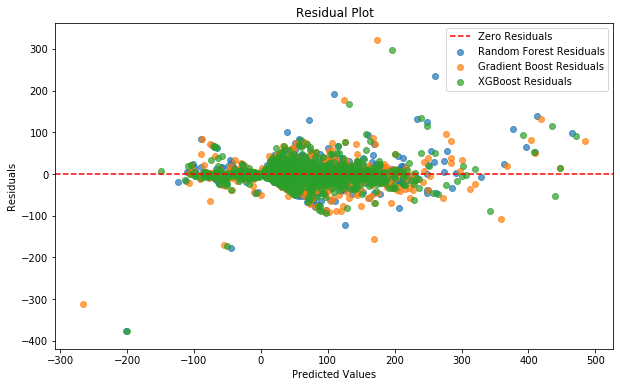

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

pred1 = best_rf.predict(X_test)
pred2 = best_grad.predict(X_test)
pred3 = best_xgb.predict(X_test)

residuals1 = y_test - pred1
residuals2 = y_test - pred2
residuals3 = y_test - pred3

plt.figure(figsize=(10, 6))

plt.scatter(pred1, residuals1, label='Random Forest Residuals', alpha=0.7)
plt.scatter(pred2, residuals2, label='Gradient Boost Residuals', alpha=0.7)
plt.scatter(pred3, residuals3, label='XGBoost Residuals', alpha=0.7)

plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')

plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


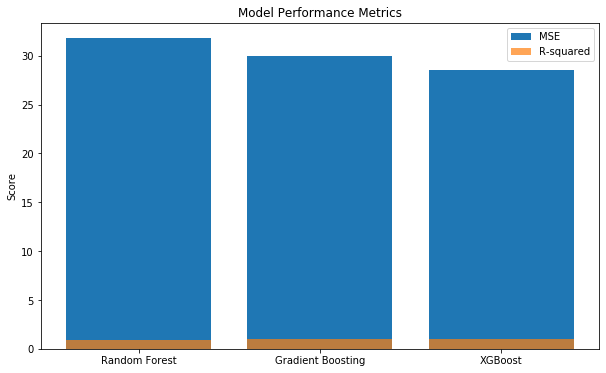

In [54]:
mse_scores = [mean_squared_error(y_test, model.predict(X_test)) for model in [best_rf, best_grad, best_xgb]]
r2_scores = [r2_score(y_test, model.predict(X_test)) for model in [best_rf, best_grad, best_xgb]]

models = ['Random Forest', 'Gradient Boosting', 'XGBoost']

plt.figure(figsize=(10, 6))

# Bar chart for MSE
plt.bar(models, mse_scores, label='MSE')

# Bar chart for R-squared
plt.bar(models, r2_scores, label='R-squared', alpha=0.7)

plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.legend()
plt.show()


- By Taking a look, It feels that XGBoost have less residuals, so taking that as the final model.

# 9 Preprocess the Test Data

- Now, it's time to make predictions on the totally unseen data which is test dataset we have.

In [55]:
test.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        48221 non-null  float64
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             48221 non-null  float64
 6   store_and_fwd_flag     48221 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 non-null  object 
 10  extra                  50000 non-null  float64
 11  tip_amount             50000 non-null  float64
 12  tolls_amount           50000 non-null  float64
 13  improvement_surcharge  50000 non-null  float64
 14  congestion_surcharge   48221 non-null  float64
 15  Ai

In [57]:
# Time to use the One Magical function
test = data_preprocessing(test)

C:\Users\raviteja\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


- By creating one method we have made the entire data preprocessing very easy!!
- Now what simple function does is as follow

1. Imputse missing values in each column with mode of that particular column.
2. One hot encoding categorical columns.
3. After onehot encoding, columns will have bool dtype, so changes them to numeric.
4. Swaps the dates where the pickup time is greater than the drop off time.
5. Adds a Trip Duration Feature.
6. Splits the Dates Columns to multiple Columns.
7. Applies Feature Transformation for trip duration column to handle outliers.
8. If the Feature transformation creates any infinity values, will replace them with mean.
9. Adds a Late night Rides Feature.
10. Finally, Returns the Entire Preprocessed data ready to be fed to machine learning models :)


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   VendorID                         50000 non-null  int64  
 1   passenger_count                  50000 non-null  float64
 2   trip_distance                    50000 non-null  float64
 3   RatecodeID                       50000 non-null  float64
 4   PULocationID                     50000 non-null  int64  
 5   DOLocationID                     50000 non-null  int64  
 6   extra                            50000 non-null  float64
 7   tip_amount                       50000 non-null  float64
 8   tolls_amount                     50000 non-null  float64
 9   improvement_surcharge            50000 non-null  float64
 10  congestion_surcharge             50000 non-null  float64
 11  Airport_fee                      50000 non-null  float64
 12  store_and_fwd_flag

# 10 Create the Submission File

In [72]:
best_xgb.fit(X,y)
y_test_pred  = best_xgb.predict(test)
submission = pd.DataFrame(columns=['ID','total_amount'])
submission['ID'] = [i+1 for i in range(len(y_test_pred))]
submission['total_amount'] = y_test_pred

NameError: name 'best_xgb' is not defined

In [60]:
submission.to_csv('submission.csv',index=False)